## <h2 style="text-align: center;"><b>Sequence to sequence models</b> 

    Seq2Seq (sequence-to-sequence) models convert an input sequence of n items into a target sequence of m items,
    where the target length m is unknown apriori and depends on the input sequence:

$$ f: \mathbf{X}_{1:n} \to \mathbf{Y}_{1:m}. $$

    Some classic NLP examples of seq2seq problems are *summarization* and *translation*.
    *E.g.*, an article of 1000 words can be summarized to 200 words or 100 words depending on its content.


    Sequence-to-sequence (seq2seq) models are also known as encoder-decoder models.
    Recurrent-based encoder-decoder is composed of two RNNs, respectively used to encode and decode sequences. 
    The first RNN encodes an arbitrary length input sequence into a single vector, commonly known as a context vector.
    You can think of the context vector as a summary representation of the entire input sentence. 
    This vector is used to bias the decoder RNN to conditionally generate the target sequence, one word at a time.

## <h2 style="text-align: center;"><b>Our task: Entailment Generation</b>


    We design an encoder-decoder model which reads an input sentence, called premise, and generates another sentence,
    called hypothesis, which is semantically entailed in the input sentence. Paraphrasing is a special case of entailment, 
    where the premise and the hypothesis entail each other.
    The image shows an example of entailment generation with encoder-decoder model.

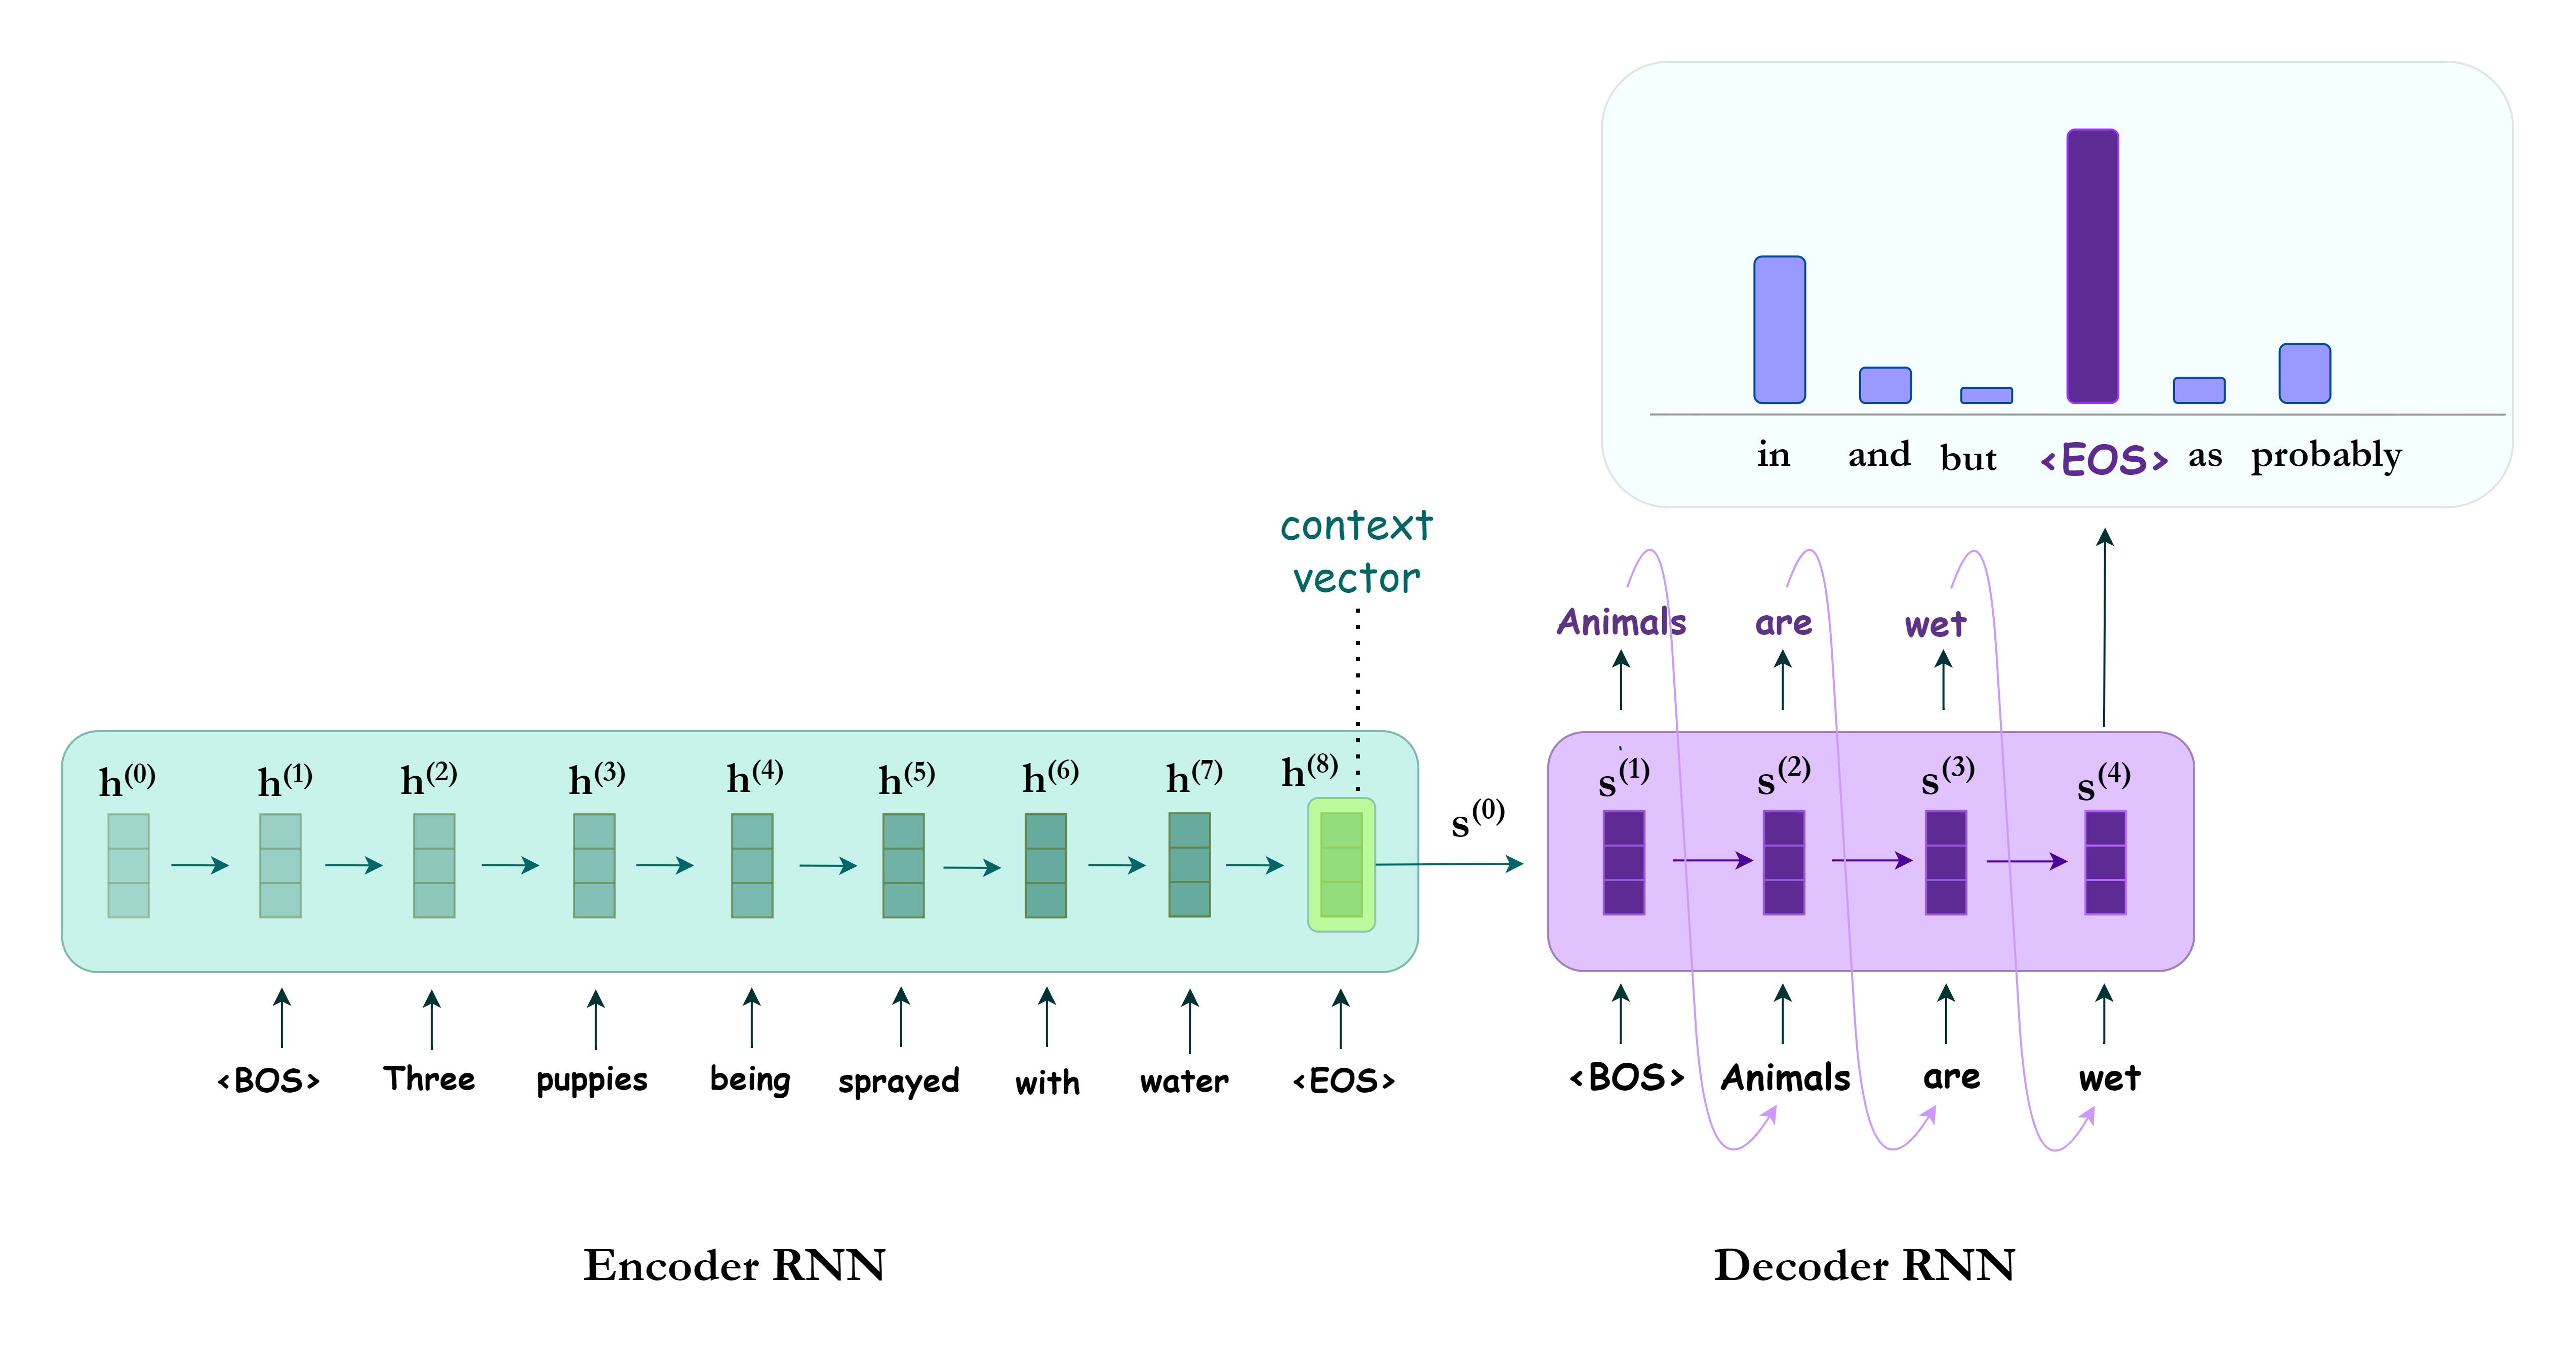

    
    The input sentence is represented with a sequence of word vecors X = {x1,x2,...,xT},
    where  x1=<bos>, x2=three , x3=puppies, x4=being, etc.
    The begin of sequence (<bos>) and end of sequence (<eos>) tokens mark the sentence boundaries.
    
    The encoder (green rnn) encodes the input sentence, (premise), by successively updating its hidden state, 𝐡.
    The initial hidden state, h^(0), is usually initialized to zeros.
    
    At each time step, the encoder RNN expects two inputs: 
    the current word x^(t) and the previous hidden state h^(t−1), and outputs a new hidden state h^(t).
    You can think of the hidden state at each step as a vector representation of the sentence so far.
    After reading the last word, <eos> , the encoder RNN outputs the final hidden state ( h^(8) in our example ).
    h^(8) is the context vector, and is used to represent the entire source sentence.
    

$$ h^{(t)}=EncoderRNN(x^{(t)}, h^{(t-1)}) $$


    We're using the term RNN generally here, it could be any recurrent architecture,
    such as an LSTM (Long Short-Term Memory) or a GRU (Gated Recurrent Unit).

    
    


    Once we have our context vector, we can start decoding it to get the target sentence, "Animals are wet".
    Again, we append begin-of-sentence and end-of-sequence tokens to the target sentence (hypothesis).
    The target sentence is the entailment that we want the decoder to predict.
    At each time-step, the input to the decoder RNN (purple) is the target word y^(t) from the hypothesis,
    and the hidden state from the previous time-step,  s^(t−1) ,
    

$$ s^{(t)}=DecoderRNN(y^{(t)}, s^{(t-1)}) $$

    The decoder is a conditional language model: It predicts the distribution of the next target word, 𝐲^(t),
    conditioned on previous words in the target sentence and the context vector from the source.
    It generates the target sequence one word at a time, sampling from the predicted distribution.

    When training/testing our model, we always know how many words there are in our target sentence, 
    so we stop generating words once we hit that many. During inference (i.e. real world usage) we keep
    generating words until the model outputs an <eos> token or after a certain amount of words have been generated.

    Once we have our predicted target sentence, Y^ ={y^1,y^2,...,y^T}, we compare it against our actual target sentence,
    Y={y1,y2,...,yT} and calculate the loss. We then use this loss to update all of the parameters in our model.


## <h2 style="text-align: center;"><b>Encoder</b>

    We design our encoder as a multi-layer recurrent network. Specifically we stack 2 LSTM layers.
    The source sentence is embedded into a sequence of word embeddings X = {x1,x2,..., xT}.
    The first LSTM layer updates its hidden state with one word embedding at a time.
    At each step it outputs a tuple, (h^(t), c^(t)) consisting of its current hidden state and the LSTM cell state.
    The current hidden state from the first LSTM layer is used as input to the LSTM in the layer above.

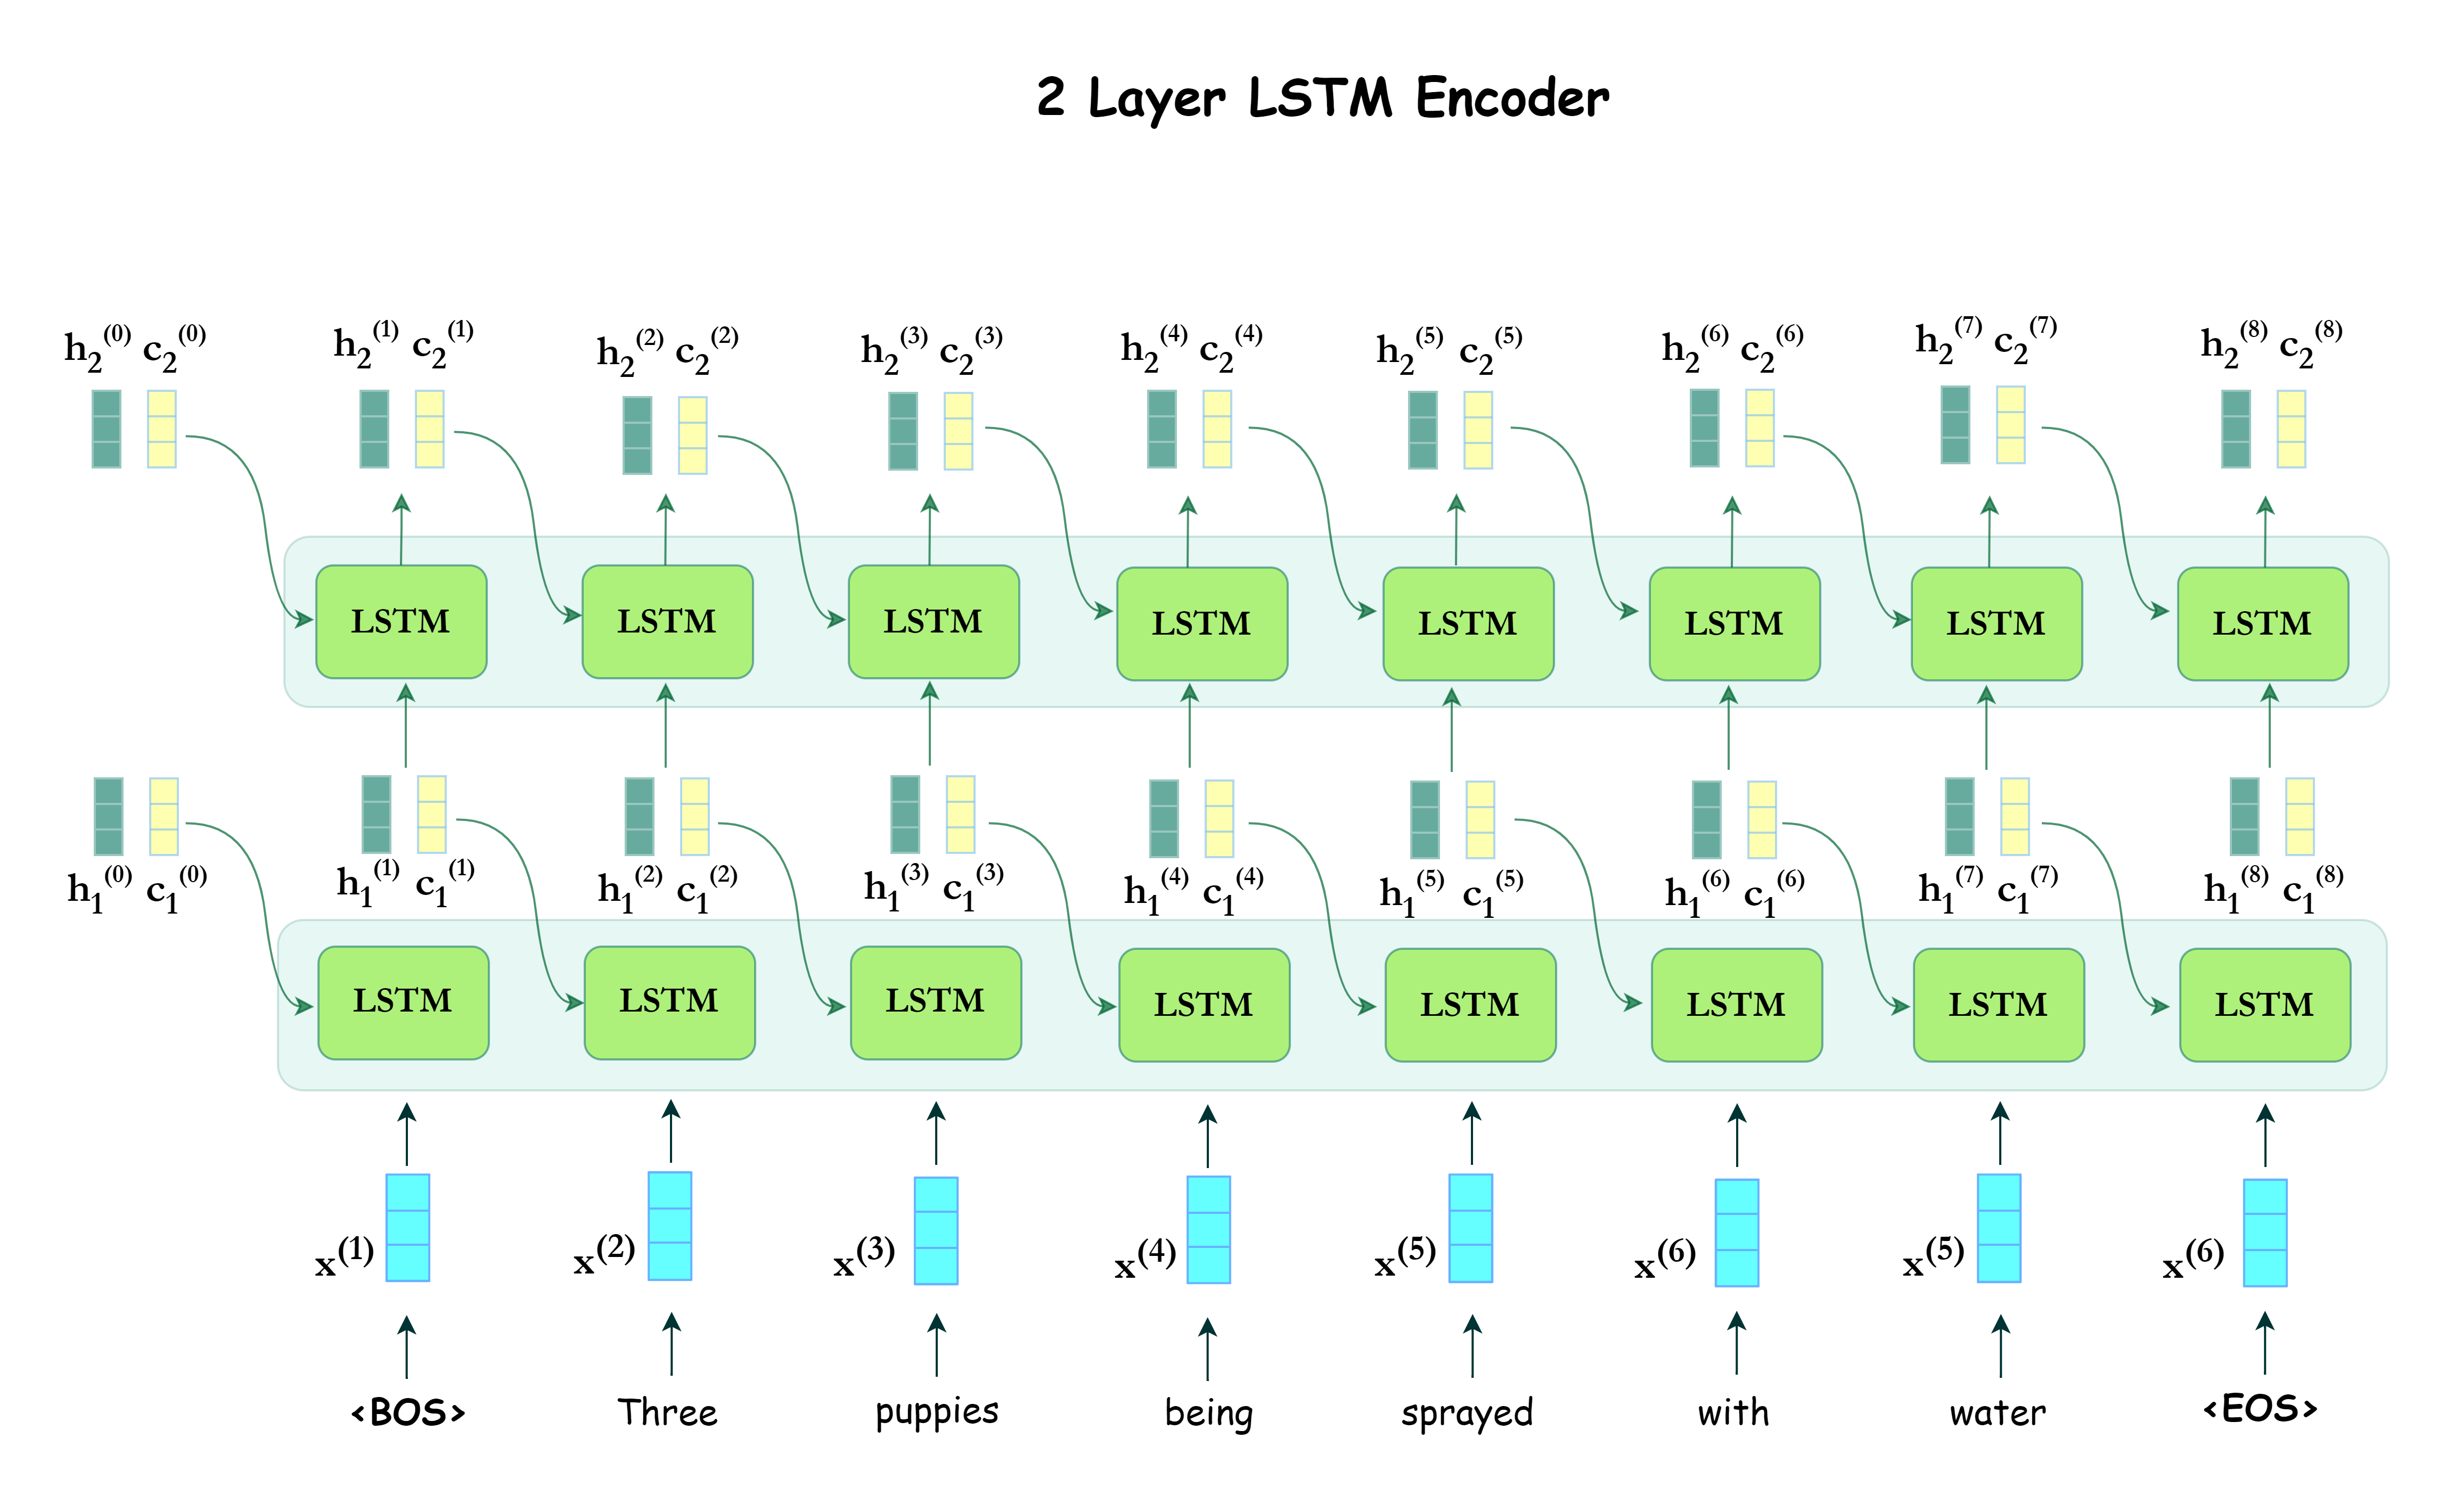

In [ ]:
NUM_LAYERS = 2
BIDIRECTIONAL = True

class Encoder(nn.Module):
    
    def __init__(self, ):
        super().__init__()
        pass
        
    def forward(self, src_sequences):
        pass
        
        
        
        
        
        
        
        
        
        
        
        # hidden = [n_dirictions * n_layers, batch_size, hidden_size]
        # cell = [n_dirictions * n_layers, batch_size, hidden_size]
        # out = [batch_size, src_len, hidden_size]
        
        # for each layer,
        # output the last hidden statse as a concatenation
        # of the last two hidden states from the forward and backward passes
        
        if self.bidirectional:
            # 1. group the last hidden states by layer
            hidden = hidden.reshape(self.n_layers, self.n_directions, -1, self.hidden_size)
            # 2. swap (1, 2) dims and 3. concatenate the last 3 dims
            hidden = hidden.transpose(1,2).reshape(self.n_layers, -1, self.n_directions * self.hidden_size)
            
            cell = cell.reshape(self.n_layers, self.n_directions, -1, self.hidden_size)
            cell = cell.transpose(1,2).reshape(self.n_layers, -1, self.n_directions * self.hidden_size)

In [2]:
import torch.nn as nn 
import torch
class Encoder(nn.Module):

    def __init__(self, embedding_dim, hidden_size, vocab_size, n_layers, dropout, bidirectional):
        super().__init__()
        
        self.emb_dim = embedding_dim
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.bidirectional = bidirectional
        self.n_directions = 2 if bidirectional else 1
        
        self.embedding_layer = nn.Embedding(num_embeddings=vocab_size,
                                      embedding_dim=embedding_dim,
                                      padding_idx=0)
    
        
        self.lstm = nn.LSTM(embedding_dim, hidden_size,
                              num_layers = n_layers,
                              bidirectional = bidirectional,
                              batch_first = True,
                              dropout = dropout)
        
        self.dropout = nn.Dropout(p = dropout)
        
      
    def forward(self, src, src_len):
        # src = [batch_size, src_max_len]
        # src_len = [batch_size]
        
        # Embed src sentence and apply dropout
        emb_src = self.embedding_layer(src)
        emb_src = self.dropout(emb_src)
        
        # emb_src = [batch size, src_len, emb_dim]

        # Pack src embeddings for efficient recurrent encoding
        emb_src = pack_padded_sequence(emb_src,
                                       src_len.cpu(),
                                       enforce_sorted = False,
                                       batch_first = True)
        
        # encode src sequence with recurrent network
        out, (hidden, cell) = self.lstm(emb_src) 
        
        # hidden = [n_dirictions * n_layers, batch_size, hidden_size]
        # cell = [n_dirictions * n_layers, batch_size, hidden_size]
        # out = [batch_size, src_len, hidden_size]
        
        if self.bidirectional:
            hidden = hidden.reshape(self.n_layers, self.n_directions, -1, self.hidden_size)
            hidden = hidden.transpose(1,2).reshape(self.n_layers, -1, self.n_directions * self.hidden_size)
            
            cell = cell.reshape(self.n_layers, self.n_directions, -1, self.hidden_size)
            cell = cell.transpose(1,2).reshape(self.n_layers, -1, self.n_directions * self.hidden_size)

        return (hidden, cell)

## <h2 style="text-align: center;"><b>Decoder</b>


    To build the decoder we stack two LSTMs and add a linear layer on top.
    The first LSTM layer receives a hidden and cell state from the previous time step, s^(t-1), c_(t-1),
    as well as the current word from target sequence, y^(t), and outputs a new hidden and cell state, s^(t), c^(t). 
    The second LSTM layer uses the hidden state from the layer below as current input,
    and the hidden and cell state from the previous step. The output is a tuple of new cell and hidden states.
    The hidden state from the top LSTM layer is projected with a linear layer to obtain a *logit vector*,
    a vector of unnormalized scores for all words in the target vocabulary.
    The *softmax* normalizes logits into conditional probablity distribution of the next target word:
    
$$ p(\mathbf{y}_t | \mathbf{s}_{t-1}, \mathbf{y}_{prev}) = \textbf{Softmax}(\mathbf{logits})$$
    
    Recall that the initial decoder hidden state s^(0) should be set equal to the final encoder hidden state h^(T).
    The first input word to the decoder RNN is <bos> token; next we can choose either to use the model prediction
    as the next input word to the decoder network, or we can simply input the ground truth, i.e.
    the actual word from the target sequence. This latter strategy is known as **teacher forcing**.
    Teacher forcing cannot be used at inference, since we no longer have the ground truth (i.e. the target sentence)
    
    

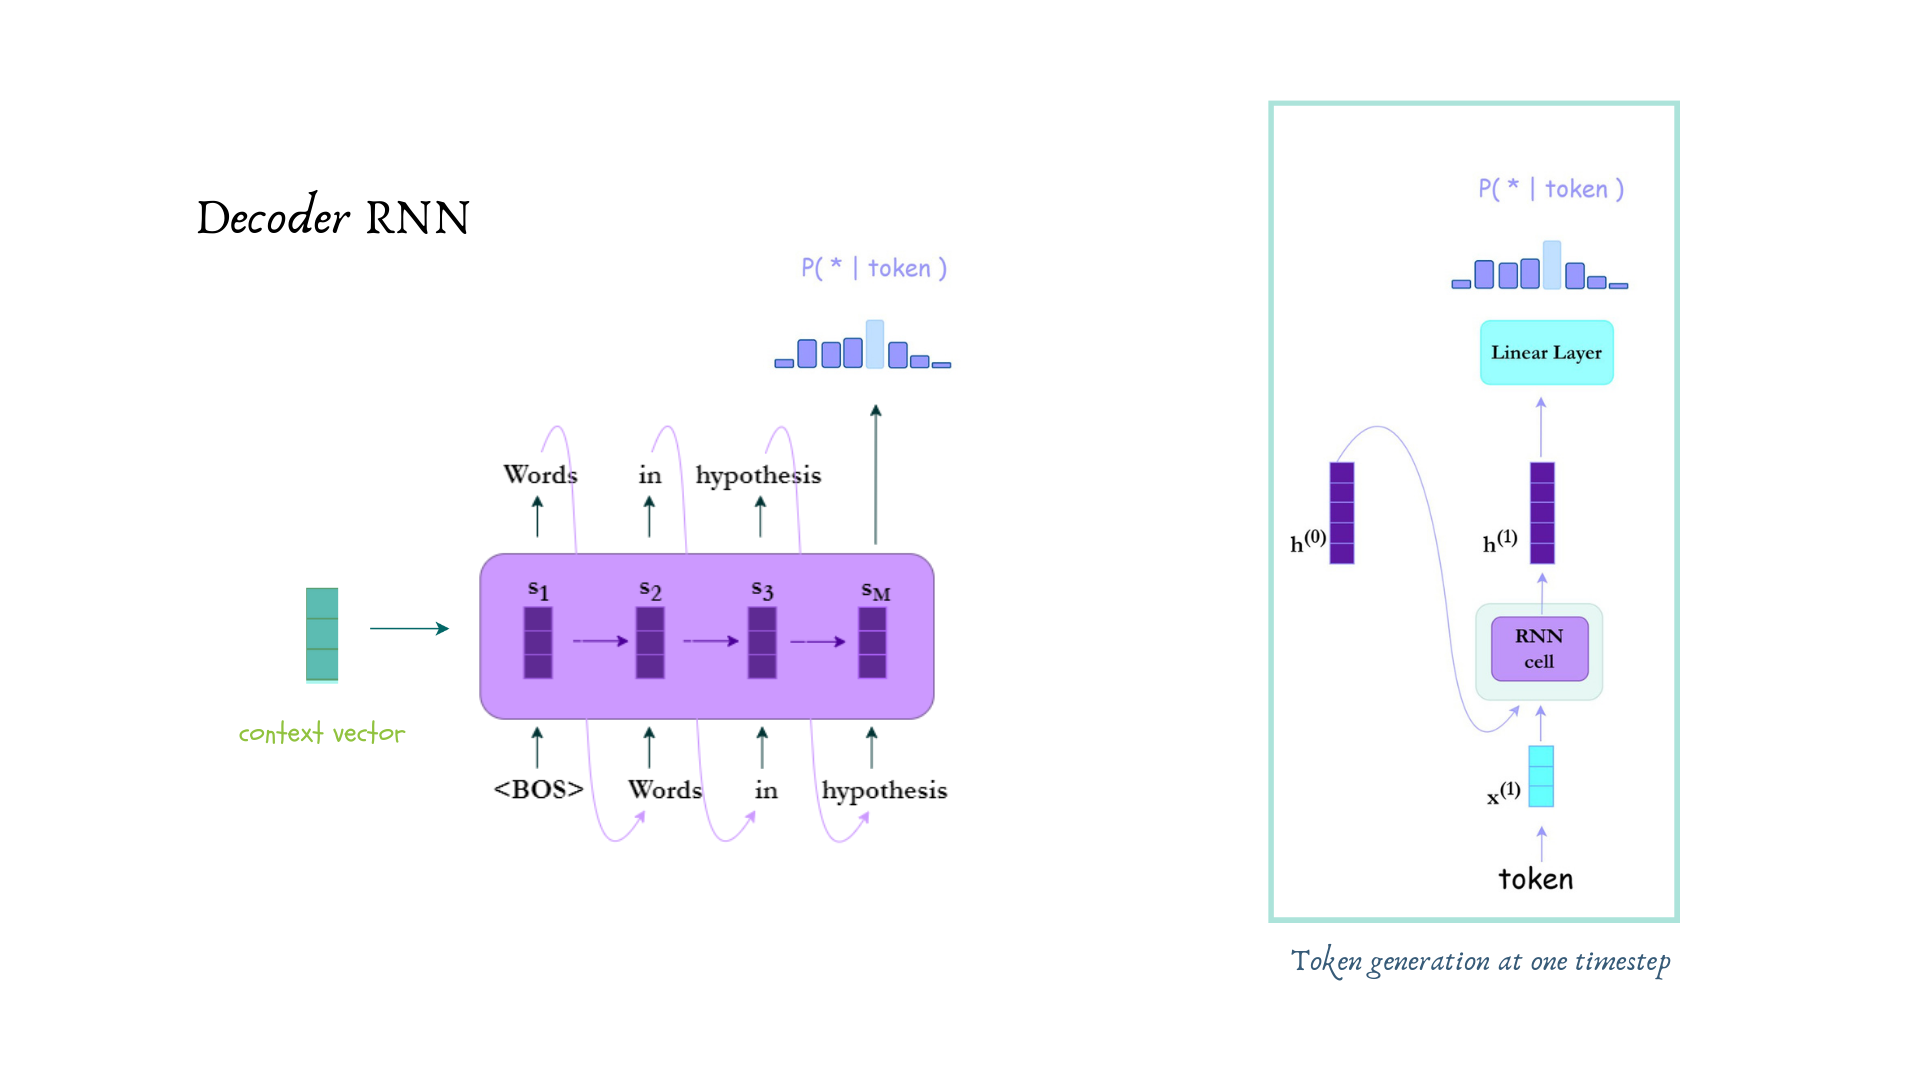

In [3]:
class Decoder(nn.Module):
    
    def __init__(self, embedding_dim, hidden_size, vocab_size, num_layers, dropout):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_classes = vocab_size
  
        self.embedding_layer = nn.Embedding(num_embeddings=vocab_size,
                                      embedding_dim=embedding_dim,
                                      padding_idx=0)
    
        self.rnn = nn.LSTM(input_size=embedding_dim,
                           hidden_size=hidden_size,
                           num_layers=num_layers,dropout=dropout,
                           batch_first = True)
    
        self.classifier = nn.Linear(hidden_size, vocab_size)
        self.dropout = nn.Dropout(dropout)
        
        
    def forward(self, trg, hidden, cell):
        
        # trg = [batch_size]
        # hidden = [num_layers, batch_size, hidden_size]
        # cell = [num_layers, batch_size, hidden_size]
        
        # make sure the input is a 2D tensor
        trg = trg.view(-1, 1) # (batch_size, 1)
        
        # embed target word
        emb_trg = self.dropout(self.embedding_layer(trg))
        
        # encode word embedding with recurrent layers
        out, (hidden, cell) = self.rnn(emb_trg, (hidden, cell)) 
        
        # obtain vocabulary scores (i.e. logits)
        logits = self.classifier(out)  
        
        # logits = [batch_size, trg_len, vocab_size]
        probabilities = F.log_softmax(logits, dim=-1)
        probabilities = probabilities.contiguous().view(-1, self.num_classes) # drom 3D to 2D
        
        # probabilities = [batch_size, vocab_size]
        return probabilities, (hidden, cell)

    Seq2Seq class puts the encoder and decoder together.
    The model takes in input pairs of sentences (source and target), and the source sentence length.
    We feed the input/source sentence (src) into the encoder and receive the final hidden and cell states.
    These two are used as initial hidden and cell state of the decoder recurrent layers.
    Now, we can start generating the target sequence. *decoder_outputs* will store the decoder preditions. 
    We decode the target sentence using teacher forcing:
    We sequentially feed the decoder with words from the target sentence (the ground truth )
    and predict the probability distribution for the next target word in the sequence.


In [4]:
class Seq2Seq(nn.Module):
    
    """
    Seq2Seq model is a container class for encoder and decoder networks.
    
    Args:
        embedding_dim(int): number of dimensions in word embedding vector
        hidden_size(int): dimension of enc/dec hidden state
        vocab_size(int): total number of word in vocabulary
        n_layers: number of recurrent layers in encoder and decoder 
        dropout(float): dropout fraction
        bidirectional(bool)
       
    """
    
    def __init__(self, embedding_dim, hidden_size, vocab_size, n_layers, dropout, bidirectional):
        super().__init__()
        
        self.encoder = Encoder(embedding_dim, hidden_size//2, vocab_size, n_layers, dropout, bidirectional)
        self.decoder = Decoder(embedding_dim, hidden_size, vocab_size, n_layers, dropout)
        
    def forward(self, src, trg, src_lens):
        
        """Args:
               src (LongTensor): src sequence
                 ``(batch_size, prem_len)``.
               trg (LongTensor): trg sequence
                 ``(batch_size, prem_len)``.
               src_lens (LongTensor): src sequence lengths
                 ``(batch_size,)``.
        """
        
        # encode source sequence
        (hidden, cell) = self.encoder(src, src_lens)
        
        # generate target sequence
        decoder_output = []
        trg = trg.permute(1, 0) 
        # trg = [trg_len, batch_size]
        
        for trg_word in trg:
            probs, (hidden, cell) = self.decoder(trg_word, hidden, cell)
            decoder_output.append(probs)
        return torch.stack(decoder_output).permute(1, 0, 2) # [batch_size, trg_len, vocab_size]

## <h2 style="text-align: center;"><b>Data preparation</b>

In [5]:
import pandas as pd
path = r"D:\Huawei Share\Download\ENTAILMENT\snli_1.0_train.txt"
dataset = pd.read_table(path, delimiter ="\t", index_col = "gold_label")\
                 .loc[["entailment"], ["sentence1", "sentence2"]].dropna()

In [ ]:
# ALL imports here

In [6]:
import re, time
from string import punctuation
from collections import Counter, OrderedDict

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext.vocab import vocab
from torchtext.data.utils import get_tokenizer
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import random_split
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
matplotlib.rcParams.update({'figure.figsize': (16, 12), 'font.size': 14})
%matplotlib inline

In [7]:
def word_tokenizer(text):
    """ Minimal sentence cleaning and tokenization."""
    
    tokenizer = get_tokenizer("basic_english")
    text = re.sub("-", " ", text)
    tokens = [word if word in punctuation else re.sub("[^a-zA-Z]", "", word.lower())
              for word in tokenizer(text)]
    return tokens

In [8]:
# Illustrating how tokenization works

example = " Minim@l's çsentence c_leaning and, tok#enization."
tokenizer = get_tokenizer("basic_english")

print(tokenizer(example))
print(word_tokenizer(example))

['minim@l', "'", 's', 'çsentence', 'c_leaning', 'and', ',', 'tok#enization', '.']
['miniml', "'", 's', 'sentence', 'cleaning', 'and', ',', 'tokenization', '.']


In [10]:
# collect unique tokens
token_counts = Counter()
for _, row in dataset.iterrows():
    token_counts.update(word_tokenizer(" ".join(row)))
    
# building the map
vocabulary = vocab(OrderedDict(token_counts), min_freq=2, specials=["<pad>", "<unk>", "<bos>", "<eos>"])
vocabulary.set_default_index(vocabulary["<unk>"])

In [11]:
len(vocabulary)

14353

In [12]:
def sentence2tensor(sentence, voc):
        """ 
        Tokenize the sentence and encode tokens (str) into integers (int);
        append <bos> and <eos> tokens and transform into a torch.tensor.

        Args:
        sentence (str): row string 
        voc (torch.vocab)
        
        Returns:
        vectorized sentence
        """
        indices = [voc[word] for word in word_tokenizer(sentence)] 
        indices = [voc["<bos>"]] + indices + [voc["<eos>"]]
        return torch.tensor(indices)

In [13]:
sentence2tensor('A person on a horse jumps over a broken down airplane.', vocabulary)

tensor([ 2,  4,  5,  6,  4,  7,  8,  9,  4, 10, 11, 12, 13,  3])

In [14]:
class EntailmentDataset(Dataset):
    
    def __init__(self, data, vocabulary):
        self.data = data
        self.voc = vocabulary
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        src, trg = self.data.iloc[idx]
        src_tensor = sentence2tensor(src, self.voc)
        trg_tensor = sentence2tensor(trg, self.voc)
        return src_tensor, trg_tensor

In [15]:
data = EntailmentDataset(dataset, vocabulary)
data[0]

(tensor([ 2,  4,  5,  6,  4,  7,  8,  9,  4, 10, 11, 12, 13,  3]),
 tensor([ 2,  4,  5, 14, 15, 16,  6,  4,  7, 13,  3]))

In [16]:
# split data into train and validation sets

torch.manual_seed(1)
train_size = int(len(data)* 0.7)
valid_size = len(data) - train_size
train_dataset, valid_dataset = random_split(list(data), [train_size, valid_size])

In [17]:
from nn.utils.rnn import pad_sequence

def collate_batch(batch):
    """ Pad premise tensors to the max premise length in a batch """
    src, trg, src_lengths = [],[],[]
    
    for src_tensor, trg_tensor in batch:
        src.append(src_tensor)
        trg.append(trg_tensor)
        src_lengths.append(src_tensor.size(0))
        
    # padding sequences to max_sequence_length
    src = pad_sequence(src, batch_first = True)
    trg = pad_sequence(trg, batch_first = True)
    
    return {"src": src,
            "trg": trg,
            "src_lengths": torch.tensor(src_lengths, dtype = torch.int64)}

In [18]:
batch_size = 32
dataloader = {
    "train": DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_batch, shuffle=True, drop_last=True),
     "valid": DataLoader(valid_dataset, batch_size=batch_size, collate_fn=collate_batch, shuffle=False, drop_last=True)}

In [19]:
batch = next(iter(dataloader["train"]))
print(batch["trg"].size())
print(batch["src"].size())
batch["src_lengths"]

torch.Size([32, 16])
torch.Size([32, 30])


tensor([15, 17, 13, 11, 18, 11, 12, 13, 14, 13, 18, 11,  9,  7, 16, 11, 14, 14,
        16,  9, 14, 23, 14, 30, 15, 21, 16, 14, 16, 12, 19, 24])

In [74]:
VOCAB_SIZE = len(vocabulary)
EMB_DIM = 256
HID_DIM = 512
N_LAYERS = 2
DROPOUT = 0.5
N_EPOCHS = 5
BIDIRECTIONAL = True
PAD_IDX = vocabulary['<pad>']


device = "cuda" if torch.cuda.is_available() else "cpu"
import torch.optim as optim
# dont forget to put the model to the right device
model = Seq2Seq(EMB_DIM, HID_DIM, VOCAB_SIZE, N_LAYERS, DROPOUT, BIDIRECTIONAL)

# initialize weights
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param, -0.08, 0.08)
        
SEED = 1234

np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
        
model.apply(init_weights)
model.to(device)

# count the number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.NLLLoss(ignore_index = PAD_IDX)

The model has 21,019,665 trainable parameters


In [75]:
def train(dataloader, train_history=None, valid_history=None):
    
    model.train()
    epoch_loss = 0
    history = []
    
    for batch_index, batch in enumerate(dataloader, start=1):
        
        src_batch = batch["src"].to(device)
        trg_batch = batch["trg"].to(device)
        src_len = batch["src_lengths"]
        
        # step 1. zero gradients
        optimizer.zero_grad()
        # step 2. make prediction
        trg_input = trg_batch[:, :-1].contiguous()
        output = model(src_batch, trg_input, src_len)
        
        # reshape predictions and targets for loss computation
        y_pred = output.contiguous().view(-1, output.size(2))
        y_true = trg_batch[:, 1:].contiguous().view(-1)
        
        # step 3. compute loss
        loss = loss_fn(y_pred, y_true)
        # step 4. compute gradients
        loss.backward()
        # step 5. update params
        optimizer.step()
        # step 6. reporting
        epoch_loss += loss.item()
        
        history.append(loss.item())
        if ( batch_index) % 10 == 0:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

            clear_output(True)
            ax[0].plot(history, label='train loss')
            ax[0].set_xlabel('Batch')
            ax[0].set_title('Train loss')
            if train_history is not None:
                ax[1].plot(train_history, label='general train history')
                ax[1].set_xlabel('Epoch')
            if valid_history is not None:
                ax[1].plot(valid_history, label='general valid history')
            plt.legend()
            plt.show()
            
    return epoch_loss / len(dataloader)

def evaluate(dataloader):
    
    model.eval()
    
    epoch_loss = 0 
    history = []
    
    with torch.no_grad():
    
        for batch_index, batch in enumerate(dataloader, start=1):

            src_batch = batch["src"].to(device)
            trg_batch = batch["trg"].to(device)
            src_len = batch["src_lengths"]
            
            # step 2. make prediction
            output = model(src_batch, trg_batch[:, :-1], src_len) 
            y_pred = output.contiguous().view(-1, output.size(2))
            y_true = trg_batch[:, 1:].contiguous().view(-1)
            
            # step 3. compute loss
            loss = loss_fn(y_pred, y_true)
            epoch_loss += loss.item()
        
    return epoch_loss / len(dataloader)


def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [22]:
N_EPOCHS

10

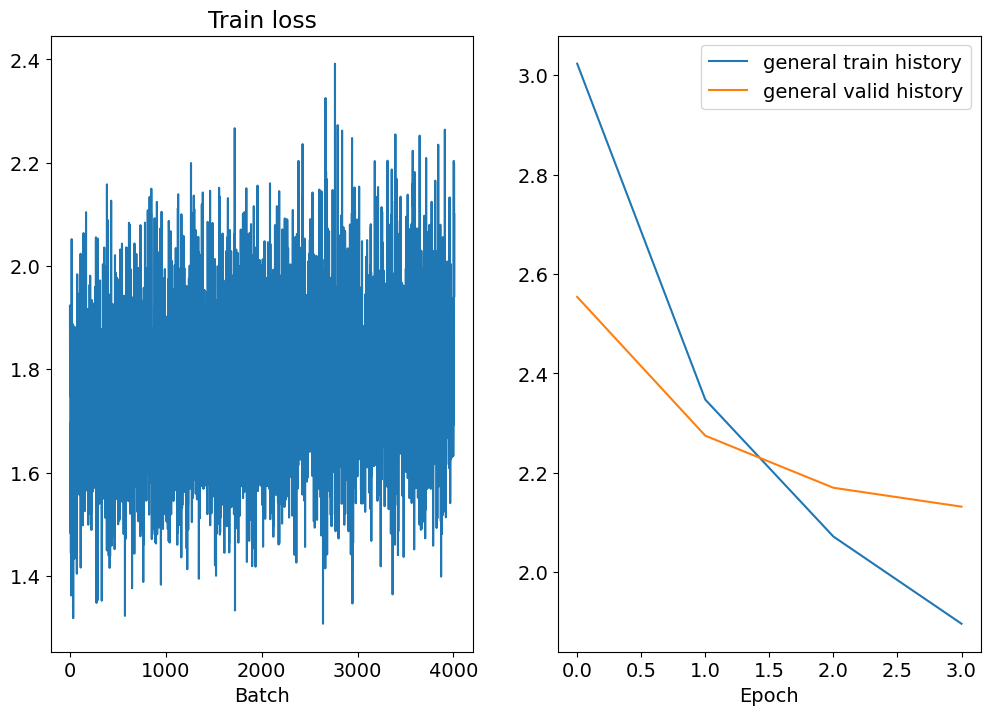

Epoch: 05 | Time: 20m 15s
	Train Loss: 1.772 | Train PPL:   5.880
	 Val. Loss: 2.115 |  Val. PPL:   8.293


In [76]:
train_history = []
valid_history = []
import math
import sys

try:
    for epoch in range(N_EPOCHS):
    
        start_time = time.time()    
        train_loss = train(dataloader["train"], train_history, valid_history)
        valid_loss = evaluate(dataloader["valid"])
        end_time = time.time()
        
        epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        
        train_history.append(train_loss)
        valid_history.append(valid_loss)
        print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
        print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')
except KeyboardInterrupt:
    print("Quit !")
    sys.exit(0)

In [47]:
def greedy_decoder(model, encoder_hidden, vocab, device):
    
    """ Generates a hypothesis for a given premise.
    Args:
        model: trained seq2seq model 
        encoder_hidden: tuple of two tensors (hidden_state, cell_state) with shape (2, 1, hidden_size) 
        vocab: Vocabulary object
        device: device
        
    Returns:
        decoded_hypothesis: str
        attention_weights: array with size (hypothesis_len, premise_len)
    """
    
    # initiate decoder hidden_state with encoder final hidden state
    hidden, cell = encoder_hidden

    # create a tensor for <bos> token
    input_word = torch.tensor([vocab["<bos>"]]).view(1, 1).to(device)
  
    decoded_hypothesis = []
    
    # start to decode a sequence of at most 20 tokens
    for step in range(20):
        
        # compute probability distribution, hidden state
        probabilities, (hidden, cell) = model.decoder(input_word, hidden, cell)
        
        # decode the word with max probability score, stop if it is <eos> token
        _, topi = probabilities.data.topk(1)
        topi = topi.view(-1)
        decoded_word = vocab.lookup_tokens([int(topi)])[0]
        if decoded_word == "<eos>":
            break
    
        input_word = topi.detach().view(-1, 1)
        decoded_hypothesis.append(decoded_word)

    return "<bos> " + " ".join(decoded_hypothesis) + " <eos>"


def predict(premise, model, vocab, device): 
     
    """ Implements greedy decoding to generate the entailed sentence for a given premise.
      Args:
      premise: str
      model: seq2seq model
      vocab: Vocabulary object
      device: precessing device
    
      Returns:
      entailed_sentence: str
      attention_weights: array with size (hypothesis_len, premise_len)
      """

    premise_tensor = premise.view(1, -1).to(device)
    premise_len = torch.tensor([premise_tensor.size(1)]).to(device)
    
    model.eval()
    
    with torch.no_grad():
        
        # retrieve contextual representation of premise(annotations) and the final hidden state
        (hidden, cell) = model.encoder(premise_tensor, premise_len)
        
        # generate the hypothesis and compute attention weights
        entailed_sentence = greedy_decoder(model, (hidden, cell), vocab, device)
        
    return entailed_sentence

In [95]:
sample_index=11
prem = train_dataset[sample_index][0]
hypo = predict(prem, model, vocabulary, device)
" ".join(vocabulary.lookup_tokens(list(train_dataset[sample_index][0]))), hypo

('<bos> a man and woman sitting on a deck next to a lake . <eos>',
 '<bos> two people are sitting on a rock .<eos>')

('<bos> a person on a horse jumps over a broken down airplane . <eos>',
 '<bos> a woman is cleaning the street .<eos>')

In [94]:
torch.save(model.state_dict(), 'seq2seq_model.pt')